# Exploritory Data Analysis 
### WGU MSDA D207
### by: Orland Cole Malphrus

### A: Reaseach question and issue at hand
#### A1:
What are the relationships of hospital readmission with marital status, primary service, and risk of complication? 

#### A2:
The results of this study will give insight to hospitals to allow them to focus on areas that will make a meaningful impact on the hospital readmission rate. While a hospital cannot control many of the variables in a given medical situation they are able to add support and identify risk factors if they have the correct understanding of which variables are correlated with or causal to readmission. While this study will not prove causation it will identify factors that share a dependent relation with hospital readmission rate which is a crucial next step.

#### A3:
For the first part of this report, we will be looking at the Readmission column labeled “Readmis”, the Marital Status column labeled “Marital”, the Primary Servicer rendered column labeled “Service” and the Risk of Complication column labeled “Complication_risk”. 

### B: Describe the data analysis

#### B1: Code


In [1]:
from scipy.stats import chi2_contingency
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import cleaned medical dataset
df = pd.read_csv('./medical_clean.csv')
#labeled relevent feilds for the chai squared anylasis
r = "ReAdmis"
c = "Complication_risk"
s = "Services"
m = "Marital"

In [3]:
contengency_complication_risk = pd.crosstab(df[c], df[r])
contengency_complication_risk

ReAdmis,No,Yes
Complication_risk,,
High,2135,1223
Low,1343,782
Medium,2853,1664


In [4]:
contengency_services = pd.crosstab(df[s], df[r])
contengency_services

ReAdmis,No,Yes
Services,,
Blood Work,3335,1930
CT Scan,737,488
Intravenous,2027,1103
MRI,232,148


In [5]:
contengency_marital = pd.crosstab(df[m], df[r])
contengency_marital

ReAdmis,No,Yes
Marital,,
Divorced,1283,678
Married,1268,755
Never Married,1243,741
Separated,1259,728
Widowed,1278,767


In [6]:
chi2_table_05 = {
    2: 5.991,
    3: 7.815,
    4: 9.488
}

def chi2_analize(contengency_tables):
    for contengency, label in contengency_tables:
        
        #calculate chi square values
        chi, p, dof, ex = chi2_contingency(contengency)
        # make assertion based on an alpha of .o5
        assertion = chi < chi2_table_05[dof]
        assertion_string = "Accept" if assertion else "Reject"
        #print formatted output
        print(f"Chi2 analysis for {label}")
        print(f"Test Statistic:      {chi}")
        print(f"P Value:             {p}")
        print(f"Degrees of Freedom:  {dof}")
        print(f"{assertion_string} null hypothosis based on an alpha of .05")
        print(f"\n \n")

#### B2: Output and the Results

In [7]:
test_contengencies = [
    (contengency_marital, "Marital Status"),
    (contengency_services, "Primary Service"),
    (contengency_complication_risk, "Complication Risk")  
]
     
chi2_analize(test_contengencies)

Chi2 analysis for Marital Status
Test Statistic:      5.085194357694356
P Value:             0.2786671961905379
Degrees of Freedom:  4
Accept null hypothosis based on an alpha of .05

 

Chi2 analysis for Primary Service
Test Statistic:      8.892645054628435
P Value:             0.03075281113212747
Degrees of Freedom:  3
Reject null hypothosis based on an alpha of .05

 

Chi2 analysis for Complication Risk
Test Statistic:      0.15902193516217972
P Value:             0.923567890607327
Degrees of Freedom:  2
Accept null hypothosis based on an alpha of .05

 



#### B3:
The Chi-squared method of analysis is a natural fit for this data set as it is a random sample and each of the chosen categories contains at least 5 results. The Chi-squared test of independence more specifically is incredibly useful for determining if a particular categorical variable is worth further investigation due to its statistically significant relationship with the other variable.

### C: Univariant Analyis

##### Continuous

1. Age
2. Initial Days

##### Catagorical

1. Services
2. Area

#### C1: Continuous

In [8]:
age = df["Age"]
initial_days = df["Initial_days"]

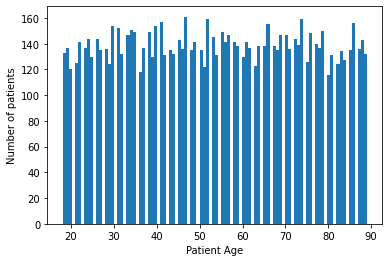

In [9]:
plt.hist(age, bins=100)
plt.xlabel("Patient Age")
plt.ylabel("Number of patients")
plt.show()

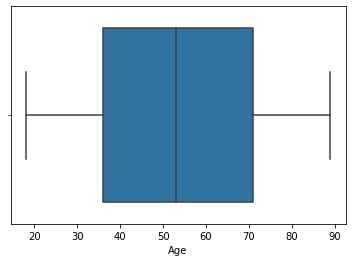

In [10]:
sns.boxplot(x= age)
plt.show()

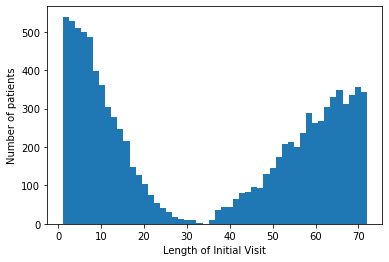

In [11]:
plt.hist(initial_days, bins=50)
plt.xlabel("Length of Initial Visit")
plt.ylabel("Number of patients")
plt.show()

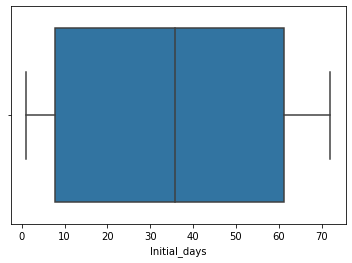

In [12]:
sns.boxplot(x= initial_days)
plt.show()

#### C2: Catagorical

In [13]:
services = df["Services"]
area = df["Area"]

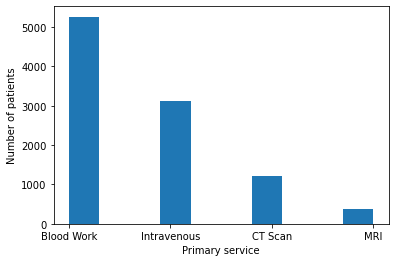

In [14]:
plt.hist(services)
plt.xlabel("Primary service")
plt.ylabel("Number of patients")
plt.show()

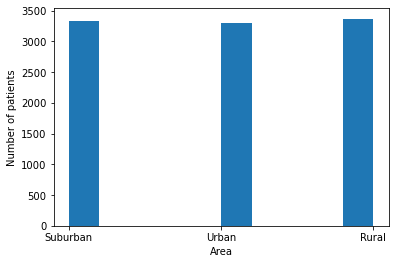

In [15]:
plt.hist(area)
plt.xlabel("Area")
plt.ylabel("Number of patients")
plt.show()

### D: Bivariant Analyis

##### Continuous

1. Age
2. Initial Days

##### Catagorical

1. Services
2. Complication Risk

#### D1: Continuous

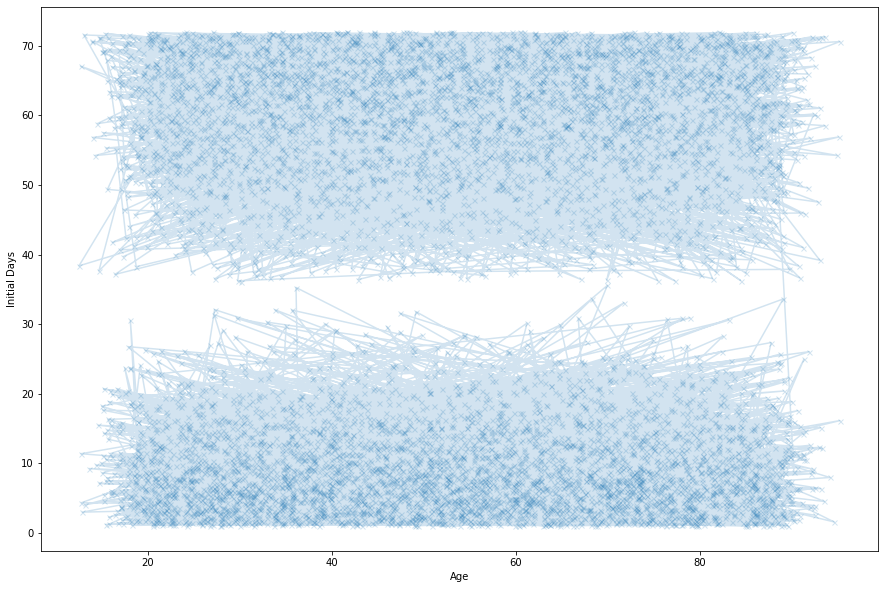

In [16]:
plt.figure(figsize=(15,10))
age = df["Age"] + np.random.normal(0,2.5, size=len(df))
initial_days = df["Initial_days"]
plt.xlabel("Age")
plt.ylabel("Initial Days")
plt.plot(age, initial_days, marker='x', markersize=5, alpha=.2)
plt.show()

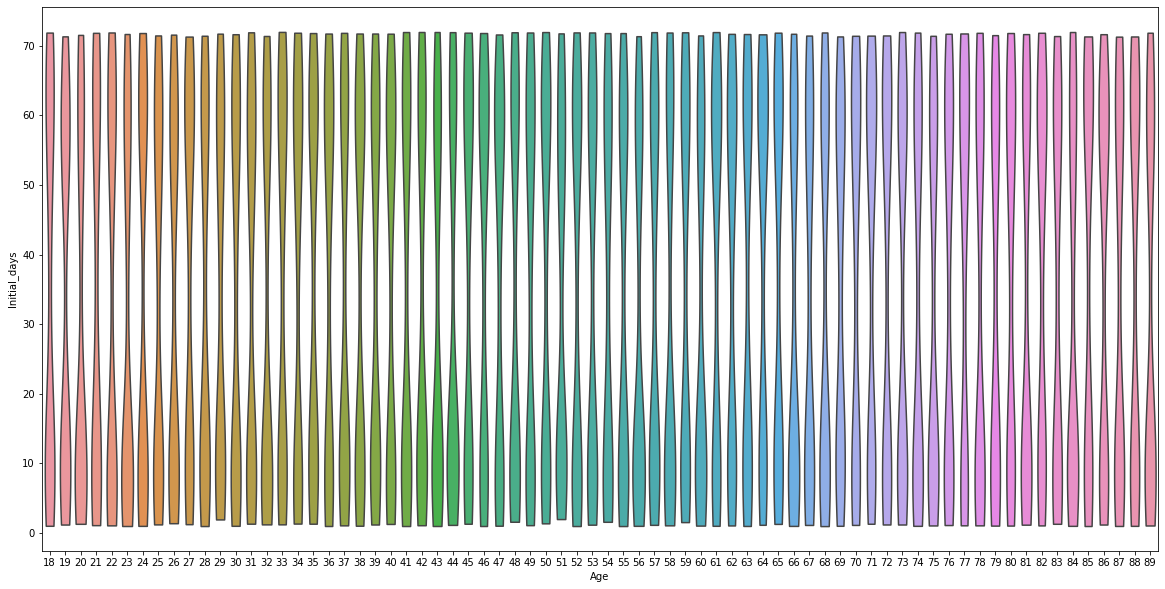

In [17]:
plt.figure(figsize=(20,10))
sns.violinplot(x="Age", y="Initial_days", data=df, split=True, cut=0, inner=None)
plt.show()

#### D1: Categorical

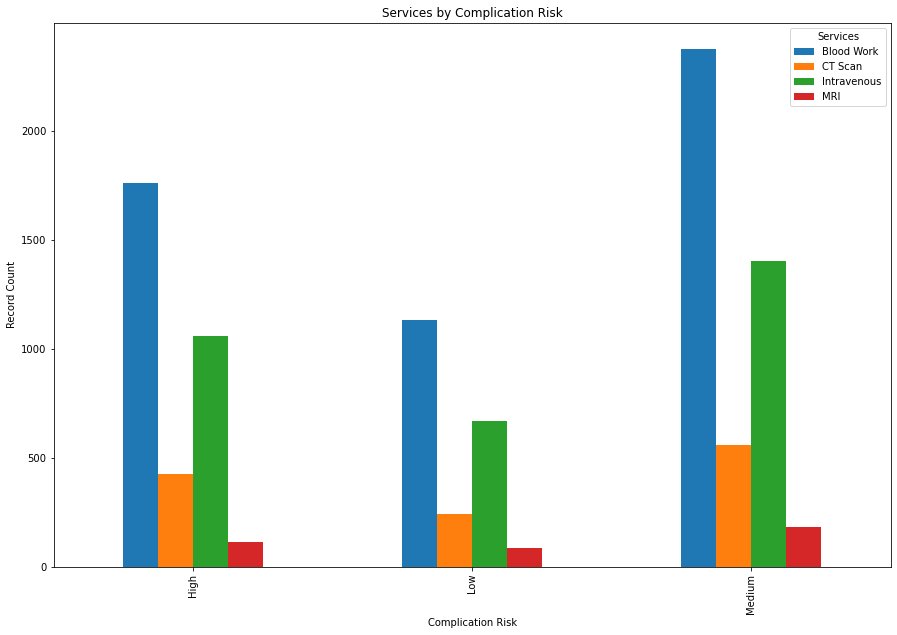

In [18]:
group_churn_state = df.groupby(['Complication_risk','Services']).size()
group_churn_state = group_churn_state.unstack()
group_churn_state.plot(kind='bar',figsize=(15,10))
plt.title('Services by Complication Risk')
plt.xlabel('Complication Risk')
plt.ylabel('Record Count')
plt.show()

### E:

#### E1.

The results of our analysis shows that there is no significant difference between the observed and expected distribution of marital status in relation to hospital readmission. The null hypothosis in this analysis was that the marital status of patients and the readmission rate were independent of one another and this analysis failed to reject this hypothesis.

The result of examining the primary service rendered showed that there was a difference between the expected and observed values for Service in relation to Readmission. The result of this analysis is to reject the null hypothesis and determine that the primary service rendered and the hospital readmisssion status share a dependent relationship.

The final analysis of Complication Risk as assessed in the initial patient screening showed that there was no significant difference between the expected and observed values. This means that we failed to reject the null hypothesis. The Complication Risk and the hospital readmission status are declared independent.


#### E2.

There are limitations of our analysis, the primary being that the analysis is not inclusive of all of the categorical data in our dataset. Further expanding the breadth of the analysis would be of great benefit to future analysis.

There are also limitations to do with the chi squared test itself. The chi squared test does a wonderful job showing that a dependent relationship exists however it does not in any way prove causation. To determine if the results are meaningful or causal will require further analysis.


#### E3.

Based off this analysis we recommend further study of the relationship between services rendered and readmission rate. This study would allow the medical providers to determine what actions can be taken to effect readmission rates. For example longer monitoring periods for patients recieving service X.

We also recommend further study into the risk of complication system that is in place at the hospital. The lack of dependence between readmission and complication risk could point to areas for improvement in hospital triage procedure.

The analysis determened that the relationship between Marital status and patient readmission where independent of one another. This leads us to recomend no further investigation needed at this time.



### F: Panopto Presentation

### G: Sources


Gagner, D. (n.d.). Chi-Square for EDA D207. Wgu.hosted.panopto.com. Retrieved September 26, 2021, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=52d9e72f-3309-4780-ac2b-accf014a436f

Downey, A. (n.d.). Exploratory Data Analysis in Python. Data Camp; Data Camp. Retrieved September 26, 2021, from https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/distributions?ex=2

The University of Utah. (n.d.). Chi-Square - Sociology 3112 - Department of Sociology - The University of utah. Soc.utah.edu; The University of Utah. Retrieved September 26, 2021, from https://soc.utah.edu/sociology3112/chi-square.php#:~:text=By%20ruling%20out%20independence%20of%20the%20two%20variables%2C